<a href="https://colab.research.google.com/github/georgeothon/DataMaster/blob/main/Data_Master_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem

[Repositório Github](https://github.com/georgeothon/DataMaster)

### Bibliotecas

In [ ]:
# Instalando bibliotecas necessárias
!pip install xgboost
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import optuna

from sklearn.cluster import KMeans, DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder
from sklearn.metrics import silhouette_score

from xgboost import plot_importance

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

pd.options.display.max_columns = 999

import warnings
warnings.filterwarnings('ignore')

In [ ]:
seed = 346

In [ ]:
np.random.seed(100)

### Leitura dos dados

In [ ]:
file_path = '/content/drive/MyDrive/Data Master/Dados/train.csv'

train = pd.read_csv(file_path, index_col='ID')#[:5000]
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

#### Separação entre treino e teste

In [ ]:
df_train, df_test = train_test_split(train, test_size=.3, random_state=seed)

In [ ]:
train.head(3)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

In [ ]:
X_train = df_train.drop('TARGET', axis=1)
y_train = df_train['TARGET']

X_test = df_test.drop('TARGET', axis=1)
y_test = df_test['TARGET']

In [ ]:
features = X_train.columns

### Utils

In [ ]:
def profit(y_true, y_pred):
  """
  Calcula o lucro da ação
  """
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  profit = 90*tp - 10*fp
  return profit

def evaluate(model, X, y, threshold=.5):
  """
  Calcula o lucro da ação e o auc do modelo
  """
  p = model.predict_proba(X)[:,1]
  y_pred = (p > threshold).astype(int)

  auc = roc_auc_score(y, p)
  auc_pred = roc_auc_score(y, y_pred)

  profit_ = profit(y, y_pred)

  print(f'\nLucro da ação: R${profit_}')
  print(f'AUC: {auc}')

  print('\nMatriz de confusão')
  display(confusion_matrix(y, y_pred))

  return profit_, auc, auc_pred

## Exercício a)

Para a primeira tarefa, temos que indicar quais os clientes devem ser acionados para maximizar o lucro. Sendo assim, partiremos de um modelo *baseline* utilizado todas as variáveis e com todos os parâmetros *default*.

### Modelo Baseline

In [ ]:
# Modelo baseline
base_model = XGBClassifier()
base_model.fit(X_train, y_train)
evaluate(base_model, X_train, y_train)
evaluate(base_model, X_test, y_test)


Lucro da ação: R$430
AUC: 0.8595199222392078

Matriz de confusão


array([[51153,     2],
       [ 2054,     5]])


Lucro da ação: R$180
AUC: 0.8379361674237269

Matriz de confusão


array([[21857,     0],
       [  947,     2]])

(180, 0.8379361674237269, 0.5010537407797682)

Começamos obtendo um lucro de 180 reais! Com base no modelo, acionariamos 2 pessoas que realmente estariam insatisfeitas.

Para reduzir o tempo de execução, vamos retirar as *features* sem variância, pois elas não agregam nada ao modelo.

In [ ]:
novar_features = []
for f in features:
  if df_train[f].nunique() == 1:
    novar_features.append(f)

features_w_var = features.drop(novar_features)
print(f'{len(features_w_var)} variáveis possuem variância não nula.')

334 variáveis possuem variância não nula.


### Variáveis com forte correlação

In [ ]:
matrix_corr = df_train[features].corr(method='spearman')

#### Correlação = 1

Para um modelo baseado em árvore, variáveis com relações monotônicas são praticamente o mesmo.

In [ ]:
corr_one = matrix_corr[(matrix_corr.abs() == 1).sum(axis=1) > 1].index.tolist()

features_low_corr = features_w_var.drop(corr_one)
print(f'Retirando ao menos uma das variáveis com correlação igual a 1 ficamos com {len(features_w_var)} variáveis.')

Retirando ao menos uma das variáveis com correlação igual a 1 ficamos com 334 variáveis.


Como não temos variáveis com relação monotônica, podemos tunar os hiperparâmetros antes de selecionar as demais variáveis com forte correlação para retirar do modelo e testar.

### Otimização Bayesiana de hiperparâmetros

Agora vamos otimizar os hiperparâmetros do modelo para tentar encontrar os que nos fornecem a melhor performance nos dados de teste.

Para isso, estamos utilizando uma otimização bayesiana, baseada no Teorema de Bayes, utiliza os resultados passados para escolher a próxima combinação de hiperparâmetros à ser testada, assim, podemos encontrar melhores parâmetros em menos tempo, quando comparado ao *Grid Search*.

Definimos a função objetivo como sendo uma validação cruzada com amostra estratificada (mantendo a distribuição do *target*), utilizano como *score* o AUC.

In [ ]:
%%time
def objective(trial):
  params = {
      'learning_rate': trial.suggest_float('learning_rate', .001, .1, log=True),
      'n_estimators': trial.suggest_int('n_estimators', 100, 200),
      'max_depth': trial.suggest_int('max_depth', 4, 15),
      #'min_child_weight': trial.suggest_categorical('min_child_weight', [1, 100, 300]),
      #'scale_pos_weight': trial.suggest_categorical('scale_pos_weight', [1, (1-0.038)/0.038, 10])
  }

  model = XGBClassifier(**params)

  kfold = StratifiedKFold(n_splits=3, shuffle=True)

  return cross_val_score(model, X_train[features_low_corr], y_train, cv=kfold, scoring='roc_auc').mean()

#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=50)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 54.4 µs


Apos pouco mais de duas horas buscamos os hiperparâmetros `learning_rate`, `n_estimators` e o `max_depth`,obtivemos os resultados abaixo.

In [ ]:
# Classe auxiliar para salvar resultados
class StudyOptuna:
  def __init__(self, best_params, best_value):
    self.best_params = best_params
    self.best_value = best_value

In [ ]:
# Resultados da otimização bayesiana
params = {'learning_rate': 0.03729808811596485, 'max_depth': 5, 'n_estimators': 131}
auc = 0.8389420363983816

study = StudyOptuna(params, auc)

In [ ]:
study.best_params

{'learning_rate': 0.03729808811596485, 'max_depth': 5, 'n_estimators': 131}

Antes de avaliar o lucro obtido após tunar os hiperparâmetros precisamos encontrar um limiar de probabilidade avaliando o lucro, *precision*, *recall* e a AUC nos dados de treinamento.

In [ ]:
model_tuned = XGBClassifier(**study.best_params)
model_tuned.fit(X_train[features_low_corr], y_train)

p = model_tuned.predict_proba(X_train[features_low_corr])[:,1]

n = 100

t_list = np.array(range(n))/n

profit_list = np.zeros(n)
auc_list = np.zeros(n)
recall_list = np.zeros(n)
precision_list = np.zeros(n)

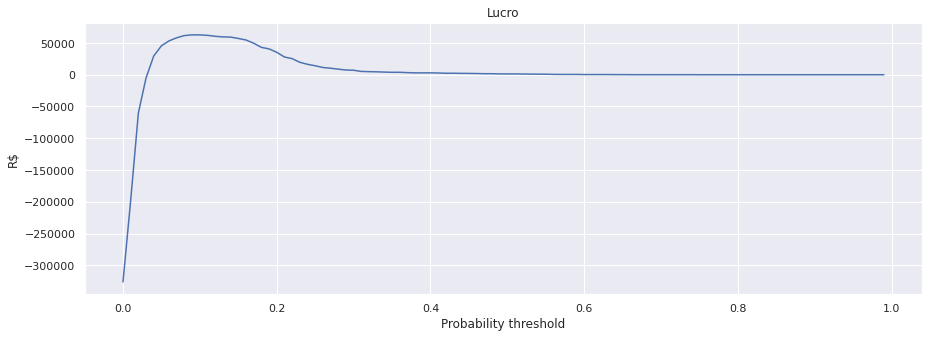

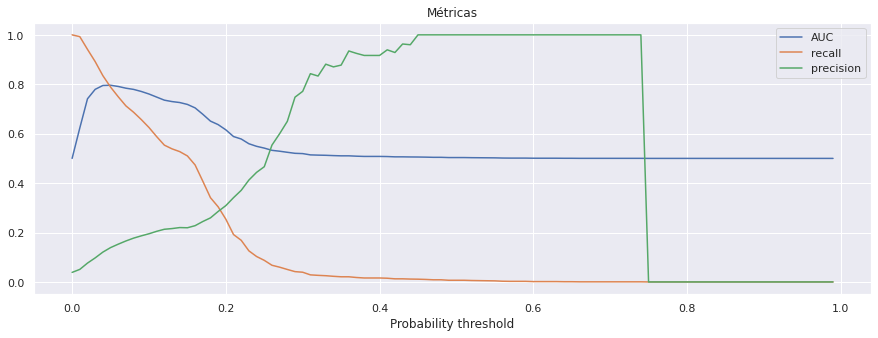

In [ ]:
for i in range(n):
  t = t_list[i]

  y_pred = ( p > t ).astype(int)
  profit_list[i] = profit(y_train, y_pred)
  auc_list[i] = roc_auc_score(y_train, y_pred)
  recall_list[i] = recall_score(y_train, y_pred)
  precision_list[i] = precision_score(y_train, y_pred)

plt.figure(figsize=(15,5))
sns.lineplot(t_list, profit_list)
plt.title('Lucro')
plt.ylabel('R$')
plt.xlabel('Probability threshold')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(t_list, auc_list, label='AUC')
sns.lineplot(t_list, recall_list, label='recall')
sns.lineplot(t_list, precision_list, label='precision')
plt.legend()
plt.title('Métricas')
plt.xlabel('Probability threshold')
plt.show()

Para os dados de treinamento, podemos observar um lucro mais alto para o limiar no intervalo (0,0.2), e quando observamos as o gráfico com as métricas selecionadas temos um AUC maior no mesmo intervalo.

Como o objetivo é maximizar o lucro, queremos acionar o maior número de pessoas possíveis, pois cada pessoa insatisfeita no gera R$90,00, dessa forma buscamos um *recall* mais alto, mas não podemos esquecer que os dados estão desbalanceados e conforme escolhermos um limiar menor (maximizando o *recall*) temos uma precisão menor, acionando uma quantidade maior de pessoas satisfeitas, não gerando lucro, apenas custo.

Primeiro vamos avaliar a performance do modelo nos dados de teste com o limiar que maximiza o lucro nos dados de treino, mantendo nossas métrica relativamente altas.

In [ ]:
index_max_profit = np.argmax(profit_list)

t_list[index_max_profit], profit_list[index_max_profit], auc_list[index_max_profit], recall_list[index_max_profit], precision_list[index_max_profit]

(0.09, 62780.0, 0.7708994542721701, 0.6571151044196212, 0.186569222283508)

Temos o maior lucro para os dados de treino com o limiar *0.09*, gerado 62.750,00 reais de lucro e 0.77 de AUC.

In [ ]:
evaluate(model_tuned, X_test[features_low_corr], y_test, threshold=t_list[index_max_profit])


Lucro da ação: R$22830
AUC: 0.8382666275131684

Matriz de confusão


array([[19199,  2658],
       [  400,   549]])

(22830, 0.8382666275131684, 0.7284475250638875)

Quando avaliamos o nosso modelo nos dados de teste temos um lucro de 22.830 reais! Um aumento de 22.650 reias em relação ao modelo antes da definição do limiar e dos hiperparâmetros.

Agora partindo do pressuposto de que a probabilidade do modelo está calibrada, podemos calcular lucro esperado (esperança estatística)

\

- Seja *L* a variável aleatória lucro, assumindo -10 quando o cliete está satisfeito (custo da ação) e 90 qunado o cliente está insatisfeito (lucro da ação menos o custo)

- Seja *S* a variável aleatória que indica a insatisfação do cliente, 1 para insatisfeito e 0 para satisfeito.

\

E sabemos que a probabilida de de um cliente gerar apenas um custo de 10 reais é a probabilida dele estar satisfeito, e a probabilidade do cliente do cliente gerar um lucro de 90 reais é a mesma probabilidade dele estar insatisfeito.

\

Sendo assim, a esperança do lucro pode ser escrita conforme abaixo:

\

$E(L) = E(-10P(L=-10) + 90P(L=90))$ \
$E(L)= E(-10P(S=0) + 90P(S=1))$

\

Para que o valor esperado do lucro seja positivo, podemos resolver seguinte desigualdade

\

$-10P(S=0) + 90P(S=1) > 0$ \

\

Pela Teoria das probabilidades temos que $P(S=0) + P(S=1) = 1 \implies P(S=0) = 1-P(S=1)$

\

Desse modo,

\

$-10(1-P(S=1)) + 90P(S=1) >= 0$\
$-10 + 100P(S=1) >= 0$ \
$P(S=1) >= 0.1$ \

Como aumentando o limiar, o nosso lucro diminui, vamos testar o limiar 0.1 que o limite teórico para termos lucro.

In [ ]:
evaluate(model_tuned, X_test[features_low_corr], y_test, threshold=.1)


Lucro da ação: R$23760
AUC: 0.8382666275131684

Matriz de confusão


array([[19454,  2403],
       [  418,   531]])

(23760, 0.8382666275131684, 0.7247972295059182)

Utilizando o limiar de 0.1 chegamos a um lucro de R$23.760,00, uma diferença de quase mil reais! Logo, seguiremos utilizando 0.1 como limiar.

### Seleção de variáveis

Agora vamos testar se retirando algumas variáveis temos um aumento da performance.

#### Correlação maior que 0.95

In [ ]:
corr_95a = matrix_corr[(matrix_corr.abs() > .95).sum(axis=1) > 1].index.tolist()
features_low_corr95 = features_w_var.drop(corr_95a)

In [ ]:
model_corr_less_95 = XGBClassifier(**study.best_params)
model_corr_less_95.fit(X_train[features_low_corr95], y_train)
evaluate(model_corr_less_95, X_test[features_low_corr95], y_test, .1)


Lucro da ação: R$23210
AUC: 0.8353291750338306

Matriz de confusão


array([[19480,  2377],
       [  427,   522]])

(23210, 0.8353291750338306, 0.7206501711262105)

Retirando as variáveis com correlação maior que 0.95 em valor absoluto temos um piora na performance, logo, seguiremos com as variáveis do passo anterior e tentaremos selecionar as melhores variáveis utilizado o *feature importance* do *XGBoost*.

#### Feature importance

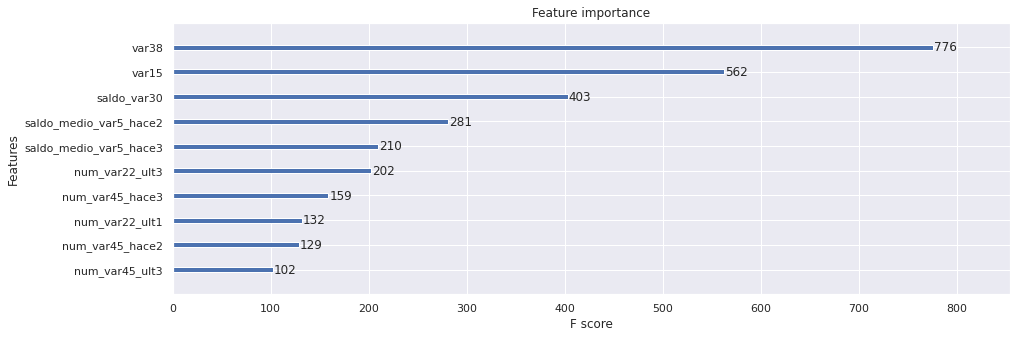

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plot_importance(model_corr_less_95, max_num_features=10, ax=ax)
plt.show()

Para selecionar as melhores variáveis poderiamos utilizar o método *Backward Elimination*, onde retiariamos a variável menos importante e retreinaria o modelo até restar apenas uma única varial, mas como o custo computacional é bastante alto, faremos um eliminação das n piores variáveis com base na sequência de Fibonacci.

In [172]:
sorted_index = model_tuned.feature_importances_.argsort()

n = len(features_low_corr)
fibo = [1, 2, 3, 5, 8, 13]

auc_list = []
profit_list = []

# Fibonacci feature selection
for i in fibo:

  print(f'\n{n-i} variáveis mais importantes')
  sort_importance_features = features_low_corr[sorted_index][:-i]

  model_sort_importance = XGBClassifier(**study.best_params)
  model_sort_importance.fit(X_train[sort_importance_features], y_train)
  prof, auc, _ = evaluate(model_sort_importance, X_test[sort_importance_features], y_test, .1)
  #prof, auc, _ = evaluate(model_sort_importance, X_train[sort_importance_features], y_train, .1)

  profit_list.append(prof)
  auc_list.append(auc)

  #sorted_index = model_sort_importance.feature_importances_.argsort()


238 variáveis mais importantes

Lucro da ação: R$23820
AUC: 0.8379302375103852

Matriz de confusão


array([[19595,  2262],
       [  433,   516]])


237 variáveis mais importantes

Lucro da ação: R$11640
AUC: 0.7750173763334651

Matriz de confusão


array([[19619,  2238],
       [  571,   378]])


236 variáveis mais importantes

Lucro da ação: R$11990
AUC: 0.7742230572097308

Matriz de confusão


array([[19618,  2239],
       [  567,   382]])


234 variáveis mais importantes

Lucro da ação: R$12290
AUC: 0.7774605488409598

Matriz de confusão


array([[19558,  2299],
       [  557,   392]])


231 variáveis mais importantes

Lucro da ação: R$12310
AUC: 0.7769529386167673

Matriz de confusão


array([[19551,  2306],
       [  556,   393]])


226 variáveis mais importantes

Lucro da ação: R$12460
AUC: 0.7743813328642113

Matriz de confusão


array([[19566,  2291],
       [  556,   393]])

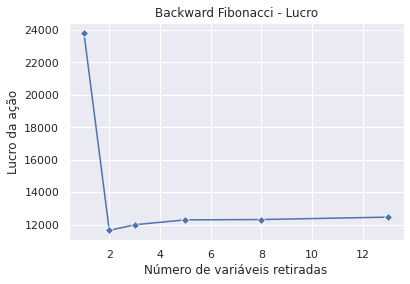

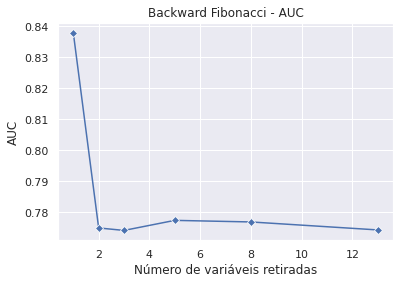

In [173]:
sns.lineplot(x=fibo, y=profit_list, marker='D')
plt.title('Backward Fibonacci - Lucro')
plt.xlabel('Número de variáveis retiradas')
plt.ylabel('Lucro da ação')
plt.show()

sns.lineplot(x=fibo, y=auc_list, marker='D')
plt.title('Backward Fibonacci - AUC')
plt.xlabel('Número de variáveis retiradas')
plt.ylabel('AUC')
plt.show()

Como o lucro da ação e o AUC diminuem de maneira significante, vamos testar o ponto que maximiza os dois indicadores antes da queda.

In [174]:
best_features = features_low_corr[sorted_index][:-1]

model_best_features = XGBClassifier(**study.best_params)
model_best_features.fit(X_train[best_features], y_train)
evaluate(model_best_features, X_test[best_features], y_test, .1)


Lucro da ação: R$23820
AUC: 0.8379302375103852

Matriz de confusão


array([[19595,  2262],
       [  433,   516]])

(23820, 0.8379302375103852, 0.7201196849355084)

Conseguimos aumetar o lucro novamente! Agora temos um lucro de R$23.820,00, o que mostra que o método de seleção de variáveis se mostrou eficaz!

## Exercício b)

Agora temos que classificar so clientes por nível de satisfação, vamos criar um rating onde o rating 1 é o mais insatisfeito e o rating 5 o mais satisfeito.

Para um primeira abordagem, vamos criar faixas para a probabilidade retornada pelo modelo do item anterior, dividindo em quantis, para manter 20% dos clientes da base de treino em cada faixa de rating.

In [ ]:
p_train = model_best_features.predict_proba(X_train[best_features])[:,1]
rating_range = [6 - i for i in range(1,6)]

rating_train, bins = pd.qcut(p_train, q=5, labels=rating_range, retbins=True)

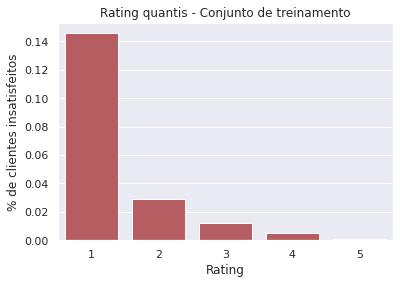

5    10835
4    10619
3    10476
2    10641
1    10643
dtype: int64

In [ ]:
sns.barplot(x=rating_train, y=y_train, order=[1,2,3,4,5], ci=None, color='r')
plt.title('Rating quantis - Conjunto de treinamento')
plt.xlabel('Rating')
plt.ylabel('% de clientes insatisfeitos')
plt.show()

rating_train.value_counts()

Podemos observar que o nível de taxa de clientes insatisfeitos é bem maior no rating 1 e existe uma redução na porcentagem de insatisfação conforme o rating aumenta. 

In [ ]:
p_test = model_best_features.predict_proba(X_test[best_features])[:,1]
rating_test = pd.cut(p_test, bins=bins, labels=rating_range)

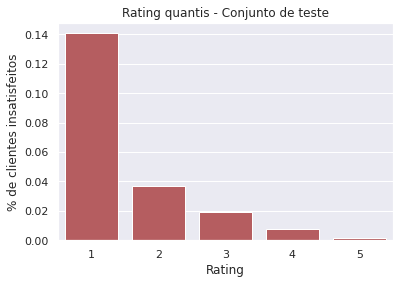

In [ ]:
sns.barplot(x=rating_test, y=y_test, order=[1,2,3,4,5], ci=None, color='r')
plt.title('Rating quantis - Conjunto de teste')
plt.xlabel('Rating')
plt.ylabel('% de clientes insatisfeitos')
plt.show()

Quando utilizamos nos dados de teste nas mesmas faixas do conjunto de treinamento, temos um história parecida,o rating tem paratames de insatisfação diferente para cada rating. Vamos então verificar qual seria o lucro caso o público que tem o rating igual a 1 recebesse uma ação de retenção.

In [ ]:
y_tr_pred = (rating_train == 1).astype(int)
y_te_pred = (rating_test == 1).astype(int)

print(f'Para o conjunto de treinamento temos um lucro de {profit(y_train, y_tr_pred)} reais,\ne para os dados de teste temos um lucro de {profit(y_test, y_te_pred)} reais.')

Para o conjunto de treinamento temos um lucro de 48670 reais,
e para os dados de teste temos um lucro de 19110 reais.


Obtivemos um bom lucro, porém menor que o obtido no exercício anterior, logo, vamos refazer as faixas definindo o corte para o rating 1 como sendo o limiar definido no item a) e dividir o restante dos dados em quantis colocando 25% do público em cada um dos quatro ratings que restaram.

In [ ]:
pd.Series(p_train).describe(percentiles=[.2,.4,.6,.8])[3:]

min    0.005299
20%    0.008404
40%    0.016117
50%    0.019488
60%    0.024916
80%    0.057047
max    0.667336
dtype: float64

In [ ]:
pd.Series(p_train[p_train < 0.1]).describe()

count    45856.000000
mean         0.022448
std          0.018403
min          0.005299
25%          0.008913
50%          0.017461
75%          0.029787
max          0.099983
dtype: float64

In [ ]:
low_bins = list(pd.Series(p_train[p_train < 0.1]).describe()[3:].values)[:-1]
low_bins

[0.005299192387610674,
 0.008912579854950309,
 0.017460506409406662,
 0.029787056148052216]

In [ ]:
best_bins = low_bins + [.1, 1]
best_bins

[0.005299192387610674,
 0.008912579854950309,
 0.017460506409406662,
 0.029787056148052216,
 0.1,
 1]

In [ ]:
final_rtg_tr = pd.cut(p_train, bins=best_bins, labels=rating_range)
final_rtg_te = pd.cut(p_test, bins=best_bins, labels=rating_range)

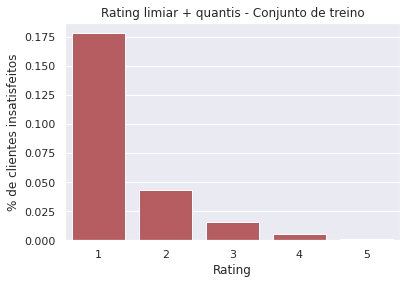

Distribuição do rating nos dados de treino


5    11431
4    11593
3    11673
2    11126
1     7358
dtype: int64

In [ ]:
sns.barplot(x=final_rtg_tr, y=y_train, order=[1,2,3,4,5], ci=None, color='r')
plt.title('Rating limiar + quantis - Conjunto de treino')
plt.xlabel('Rating')
plt.ylabel('% de clientes insatisfeitos')
plt.show()

print('Distribuição do rating nos dados de treino')
final_rtg_tr.value_counts()

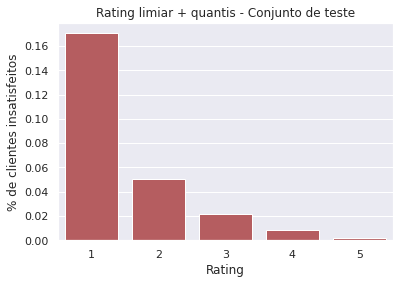

Distribuição do rating nos dados de teste


5    4971
4    4989
3    4847
2    4746
1    3237
dtype: int64

In [ ]:
sns.barplot(x=final_rtg_te, y=y_test, order=[1,2,3,4,5], ci=None, color='r')
plt.title('Rating limiar + quantis - Conjunto de teste')
plt.xlabel('Rating')
plt.ylabel('% de clientes insatisfeitos')
plt.show()

print('Distribuição do rating nos dados de teste')
final_rtg_te.value_counts()

Como esperado, ajustando o limiar de acordo com o estudo do item a), temos uma porcentagem maior de clientes insatisfeitos no grupo, e dado que o novo corte é mais restrito, ficamos com menos clientes no rating 1.

Agora vamos avaliar o lucro caso todos os clientes do rating 1 recebam a ação de retenção. Além disso, vamos simular o que acoteceriam caso os demais rating recebessem a ação.

In [ ]:
profit_train = []
profit_test = []

for i in range(1,6):
  y_pred_tr = (final_rtg_tr == 6-i).astype(int)
  y_pred_te = (final_rtg_te == 6-i).astype(int)
  profit_train.append(profit(y_train, y_pred_tr))
  profit_test.append(profit(y_test, y_pred_te))

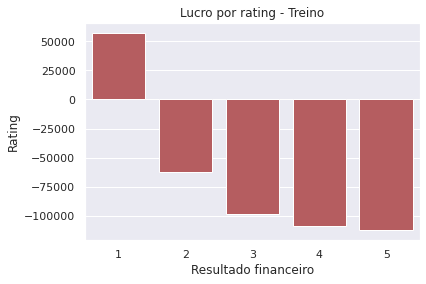

In [ ]:
sns.barplot(x=rating_range, y=profit_train, order=[1,2,3,4,5], ci=None, color='r')
plt.title('Lucro por rating - Treino')
plt.xlabel('Resultado financeiro')
plt.ylabel('Rating')
plt.show()

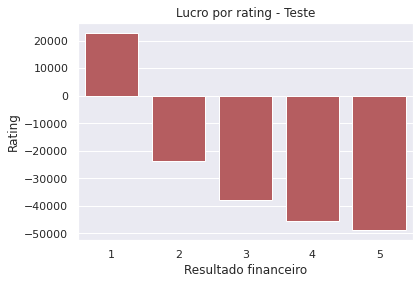

In [ ]:
sns.barplot(x=rating_range, y=profit_test, order=[1,2,3,4,5], ci=None, color='r')
plt.title('Lucro por rating - Teste')
plt.xlabel('Resultado financeiro')
plt.ylabel('Rating')
plt.show()

Tanto nos dados de treinamento, quanto nos dados de teste, o único rating que nos gera lucro é o rating 1, os demais geram um prejuizo que aumenta conforme o rating aumenta, logo, o rating discrimina o público insatisfeito e a decisão de acionar apenas o rating 1 é a correta do ponto de vista financeiro.

## Exercício c)

Para o problema de agrupamento utilizaremos o target apenas para validar se os grupos gerados pelo modelo de clusterização gerou lucro ou prejuizo.

Primero vamos selecionar novos conjuntos de treinamento e de teste.

In [ ]:
df_train_c, df_test_c = train_test_split(train, test_size=.3, random_state=19)

X_train_c = df_train_c.drop('TARGET', axis=1)
y_train_c = df_train_c['TARGET']

X_test_c = df_test_c.drop('TARGET', axis=1)
y_test_c = df_test_c['TARGET']

O primerio algoritmo de que iremos testar é o K-Means utilizando a distância euclidiana e como preprocessamento faremos uma normalização utilizando o valor máximo absoluto, dado que temos uma matriz esparsa. Vamos avaliar o coeficiente de Silhouette para definir o número de centróids.

In [ ]:
silhouette_kmeans = []
ks = []
n = 10

for k in range(3,n):
  pipe_kmeans = Pipeline([('scaler', MaxAbsScaler()), ('KMeans', KMeans(n_clusters=k, n_init=15, random_state=11))])
  pipe_kmeans.fit(X_train_c)

  pred_train = pipe_kmeans.predict(X_train_c)
  score = silhouette_score(X_train_c, pred_train)
  
  silhouette_kmeans.append(score)
  ks.append(k)

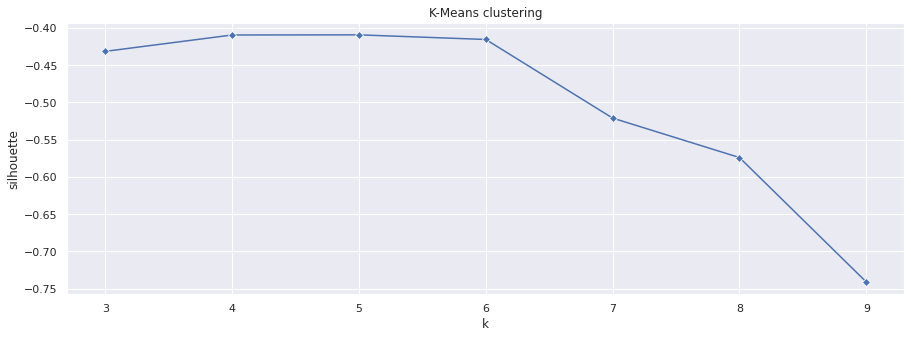

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=ks, y=silhouette_kmeans, marker='D')
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('K-Means clustering')
plt.show()

O coeficiente Silhouette é uma mediada para a avaliar o nível de separação entre os clusters, como em média, para todos o k's testados tivemos a média da silhouette negativa é possível que existam atribuições a cluster errados. Apesar do coeficiente de Silhouette não trazer bons indícios da qualidade do agrupamento, vamos avaliar a performance dos clustes para k=5 que tem a maior silhouette.

In [ ]:
k = ks[np.argmax(silhouette_kmeans)]

pipe_kmeans = Pipeline([('scaler', MaxAbsScaler()), ('KMeans', KMeans(n_clusters=k, n_init=15, random_state=42))])
pipe_kmeans.fit(X_train_c)

pred_train = pipe_kmeans.predict(X_train_c)
score_train = silhouette_score(X_train_c, pred_train)

pred_test = pipe_kmeans.predict(X_test_c)
score_test = silhouette_score(X_test_c, pred_test)

print(f'\nSilhouette Train: {score_train}')
print(f'Silhouette Test: {score_test}\n')

for i in np.unique(pred_train):
  pro_tr = profit(y_train_c, (pred_train == i).astype(int))
  pro_te = profit(y_test_c, (pred_test == i).astype(int))

  print(f'Cluster {i} \n  Lucro Treino {pro_tr}\n  Lucro Teste {pro_te}\n')


Silhouette Train: -0.4077883690800019
Silhouette Test: -0.41293829742993643

Cluster 0 
  Lucro Treino -4600
  Lucro Teste -1330

Cluster 1 
  Lucro Treino -39570
  Lucro Teste -16890

Cluster 2 
  Lucro Treino -17060
  Lucro Teste -8300

Cluster 3 
  Lucro Treino -18790
  Lucro Teste -8340

Cluster 4 
  Lucro Treino -242220
  Lucro Teste -102300



Todos os 6 clusters obtiveram prejuizo nos conjuntos de treino e de teste. O modelo pode estar sendo afetado pela quantidade de outiliers, um tratamento mais adequado para as variáveis cartegóricas como `One Hot Encoding` pode ser testado, ou até mesmo aumentar o número o número de inicializações.

Vamos testar o algoritmo DBSCAN e verificar se com ele é possível identificar os outilers, se é o motivo de não estarmos encontrando cluster que não tenham prejuizo caso acionados.

Para o preprocessamente das variáveis utilizaremos uma normalização com o valor máximo absoluto, e vamos tentar tentar encontrar a distância máxima para definir os vizinhos e avaliar o coeficiente de Silhouette.

In [ ]:
%%time
silhouette_dbscan = []
eps = []

for i in range(1,10):
  eps_ = i/10
  pipe_dbscan = Pipeline([('scaler', MaxAbsScaler()), ('DBSCAN', DBSCAN(eps=eps_, min_samples=10))])
  pipe_dbscan.fit(X_train_c)

  pred = pipe_dbscan['DBSCAN'].labels_
  score = silhouette_score(X_train_c, pred)

  silhouette_dbscan.append(score)
  eps.append(eps_)

CPU times: user 47min 44s, sys: 1min 11s, total: 48min 56s
Wall time: 29min 27s


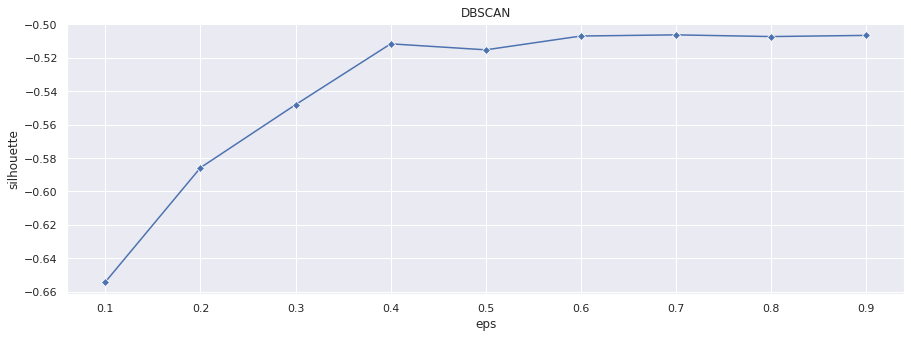

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=eps, y=silhouette_dbscan, marker='D')
plt.title('DBSCAN')
plt.xlabel('eps')
plt.ylabel('silhouette')
plt.show()

Observando o gráfico acima temos que conforme aumentamos `eps` o coeficiente também aumenta, mas assim como no k-menas, permance negativo. Vamos verificar se alguns os clusters nos gera lucro.

In [ ]:
eps_ = eps[np.argmax(silhouette_dbscan)]

pipe_dbscan = Pipeline([('scaler', MaxAbsScaler()), ('DBSCAN', DBSCAN(eps=eps_))])
pipe_dbscan.fit(X_train_c)

pred_train = pipe_dbscan['DBSCAN'].labels_
score_train = silhouette_score(X_train, pred_train)


In [ ]:
profit_dbscan = []
cluster = []

print(f'\nSilhouette: {score_train}\n')

for i in np.unique(pred_train):
  pro_tr = profit(y_train_c, (pred_train == i).astype(int))

  profit_dbscan.append(pro_tr)
  cluster.append(i)


Silhouette: -0.9756412312793962



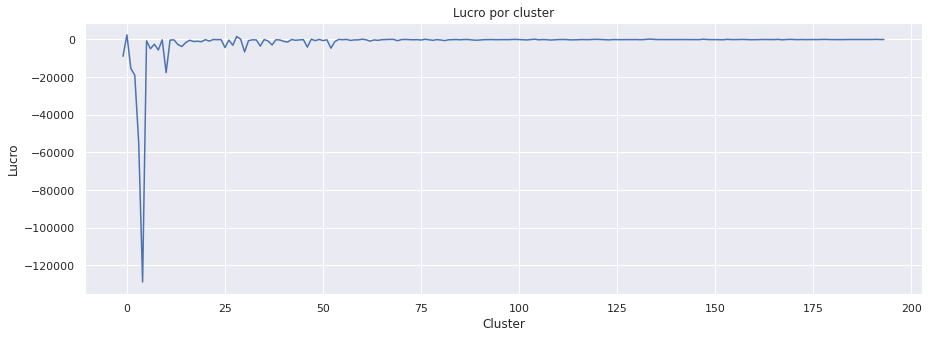

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=cluster, y=profit_dbscan)
plt.xlabel('Cluster')
plt.ylabel('Lucro')
plt.title('Lucro por cluster')
plt.show()

Nenhum dos clusters gera um lucro alto, é possível que os cluesters tenham densidade ou desvio padrão parecidos.

In [ ]:
sorted_index = np.array(profit_dbscan).argsort()[-3:]
sorted_index.sort()

In [ ]:
print(f'3 clusters de maior lucro\n')
for i in sorted_index:
  pro_dbscan = profit(y_train_c, (pred_train == cluster[i]).astype(int))
  cli_cluster = y_train[pred_train == cluster[i]]
  print(f'  > Lucro Cluster {cluster[i]}: R${pro_dbscan},00  \n  Quantidade de clientes: {cli_cluster.shape[0]}\n  % de clientes insatisfeitos: {cli_cluster.mean()}\n')

3 clusters de maior lucro

  > Lucro Cluster 0: R$2430,00  
  Quantidade de clientes: 2947
  % de clientes insatisfeitos: 0.04275534441805225

  > Lucro Cluster 28: R$1570,00  
  Quantidade de clientes: 173
  % de clientes insatisfeitos: 0.028901734104046242

  > Lucro Cluster 133: R$150,00  
  Quantidade de clientes: 15
  % de clientes insatisfeitos: 0.13333333333333333



Avaliando os 3 clusters com amior lucro temos lucro de 2430, 1570 e 150 reais para os clusters 0, 28 e 133, respectivamente.

# Referências
- [XGBoost Param tuning](https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html)
- [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)
- [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
- [K-means](https://scikit-learn.org/stable/modules/clustering.html#k-means)